## using collaborative and content based filtering with Nearest Neighbor for Movie Recommendation System

1. contentbased- based on content between people like if a person reads one article and then the other person reads that article based on other candidate review

In [2]:
import pandas as pd
import numpy as np

In [11]:
movies_df=pd.read_csv("movies.csv",usecols=['movieId','title'],dtype={'movieId':'int32','title':'string'})
ratings_df=pd.read_csv("ratings.csv",usecols=['userId','movieId','rating'],dtype={'userId':'int32','movieId':'int32','rating':'float32'})
movies_df

,movieId,title
0,1,Toy Story (1995)
1,2,Jumanji (1995)
2,3,Grumpier Old Men (1995)
3,4,Waiting to Exhale (1995)
4,5,Father of the Bride Part II (1995)
...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017)
9738,193583,No Game No Life: Zero (2017)
9739,193585,Flint (2017)
9740,193587,Bungo Stray Dogs: Dead Apple (2018)


In [8]:
ratings_df

,userId,movieId,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0
...,...,...,...
100831,610,166534,4.0
100832,610,168248,5.0
100833,610,168250,5.0
100834,610,168252,5.0


In [9]:
df_merge=pd.merge(ratings_df,movies_df,on='movieId')

In [10]:
df_merge.head()

,userId,movieId,rating,title
0,1,1,4.0,Toy Story (1995)
1,5,1,4.0,Toy Story (1995)
2,7,1,4.5,Toy Story (1995)
3,15,1,2.5,Toy Story (1995)
4,17,1,4.5,Toy Story (1995)


In [12]:
all_movies_ratings=df_merge.dropna(axis=0,subset=['title'])

In [13]:
all_movies_ratings

,userId,movieId,rating,title
0,1,1,4.0,Toy Story (1995)
1,5,1,4.0,Toy Story (1995)
2,7,1,4.5,Toy Story (1995)
3,15,1,2.5,Toy Story (1995)
4,17,1,4.5,Toy Story (1995)
...,...,...,...,...
100831,610,160341,2.5,Bloodmoon (1997)
100832,610,160527,4.5,Sympathy for the Underdog (1971)
100833,610,160836,3.0,Hazard (2005)
100834,610,163937,3.5,Blair Witch (2016)


In [14]:
ratings_count=(all_movies_ratings.groupby(by=['title'])['rating'].count().reset_index().rename(columns={'rating':'totalRatingCount'})[['title','totalRatingCount']])
ratings_count.head()

,title,totalRatingCount
0,'71 (2014),1
1,'Hellboy': The Seeds of Creation (2004),1
2,'Round Midnight (1986),2
3,'Salem's Lot (2004),1
4,'Til There Was You (1997),2


In [15]:
rating_with_totalRatingCount=df_merge.merge(ratings_count,left_on='title',right_on='title',how='left')
rating_with_totalRatingCount

,userId,movieId,rating,title,totalRatingCount
0,1,1,4.0,Toy Story (1995),215
1,5,1,4.0,Toy Story (1995),215
2,7,1,4.5,Toy Story (1995),215
3,15,1,2.5,Toy Story (1995),215
4,17,1,4.5,Toy Story (1995),215
...,...,...,...,...,...
100831,610,160341,2.5,Bloodmoon (1997),1
100832,610,160527,4.5,Sympathy for the Underdog (1971),1
100833,610,160836,3.0,Hazard (2005),1
100834,610,163937,3.5,Blair Witch (2016),1


In [21]:
pd.set_option('display.float_format',lambda x:'%.3f' % x)
print(ratings_count['totalRatingCount'].describe())

count   9719.000
mean      10.375
std       22.406
min        1.000
25%        1.000
50%        3.000
75%        9.000
max      329.000
Name: totalRatingCount, dtype: float64


array([[<AxesSubplot:title={'center':'totalRatingCount'}>]], dtype=object)

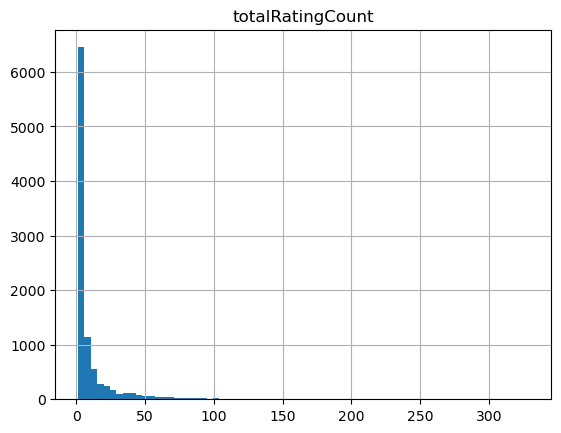

In [25]:
import matplotlib.pyplot as plt
ratings_count.hist(bins=70)


In [31]:
pop_threshold=50
popular_movie_rating=rating_with_totalRatingCount.query('totalRatingCount>=@pop_threshold')
popular_movie_rating

,userId,movieId,rating,title,totalRatingCount
0,1,1,4.000,Toy Story (1995),215
1,5,1,4.000,Toy Story (1995),215
2,7,1,4.500,Toy Story (1995),215
3,15,1,2.500,Toy Story (1995),215
4,17,1,4.500,Toy Story (1995),215
...,...,...,...,...,...
79246,603,1997,4.000,"Exorcist, The (1973)",53
79247,606,1997,3.000,"Exorcist, The (1973)",53
79248,607,1997,5.000,"Exorcist, The (1973)",53
79249,608,1997,4.500,"Exorcist, The (1973)",53


In [32]:
popular_movie_rating.shape

(41362, 5)

## lets create a pivot table

In [33]:
movie_rating_feature=popular_movie_rating.pivot_table(index='title',columns='userId',values='rating').fillna(0)

In [34]:
movie_rating_feature

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
title,,,,,,,,,,,,,,,,,,,,,
10 Things I Hate About You (1999),0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,3.000,0.000,5.000,0.000,0.000,0.000,0.000,0.000
12 Angry Men (1957),0.000,0.000,0.000,5.000,0.000,0.000,0.000,0.000,0.000,0.000,...,5.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
2001: A Space Odyssey (1968),0.000,0.000,0.000,0.000,0.000,0.000,4.000,0.000,0.000,0.000,...,0.000,0.000,5.000,0.000,0.000,5.000,0.000,3.000,0.000,4.500
28 Days Later (2002),0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,3.500,0.000,5.000
300 (2007),0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,3.000,...,0.000,0.000,0.000,0.000,3.000,0.000,0.000,5.000,0.000,4.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
X2: X-Men United (2003),0.000,0.000,0.000,0.000,0.000,0.000,4.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,4.000,0.000,4.000
You've Got Mail (1998),0.000,0.000,0.500,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,2.000,0.000,0.000,3.500,0.000,0.000,0.000,0.000
Young Frankenstein (1974),5.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,5.000,0.000,0.000,3.500,0.000,0.000,0.000,0.000


## converting pivot table into matrix

In [36]:
from scipy.sparse import csr_matrix
movie_rating_feature_matrix=csr_matrix(movie_rating_feature.values)
movie_rating_feature_matrix

<450x606 sparse matrix of type '<class 'numpy.float32'>'
	with 41360 stored elements in Compressed Sparse Row format>

## perform Nearest Neighbor classifier

In [37]:
from sklearn.neighbors import NearestNeighbors
model_knn=NearestNeighbors(metric='cosine',algorithm='brute')
model_knn.fit(movie_rating_feature_matrix)

NearestNeighbors(algorithm='brute', metric='cosine')

In [38]:
movie_rating_feature.shape

(450, 606)

## Cosine Similarity

KNN-Unsupervised Learning and its not the supervised learning
movie 1: kunfu panda
movie 2: avengere
pivot table: each table has a vector
(4,10) and (7,3) are 2 vectors say cosine tells us to find the angle between
them(2 vectors) so to find the angle between these two movies
so the similarity score between two points A and B
sim(A,B)=cos(theta)=A.B/|A||B|

In [40]:
query_index=np.random.choice(movie_rating_feature.shape[0])
print(query_index)

243


In [54]:
distances,indices=model_knn.kneighbors(movie_rating_feature.iloc[query_index,:].values.reshape(1,-1),n_neighbors=6)
distances


array([[1.1920929e-07, 3.3741766e-01, 3.9544815e-01, 4.3907338e-01,
        4.5359725e-01, 4.5723408e-01]], dtype=float32)

In [55]:
print(distances.flatten())

[1.1920929e-07 3.3741766e-01 3.9544815e-01 4.3907338e-01 4.5359725e-01
 4.5723408e-01]


In [43]:
movie_rating_feature

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
title,,,,,,,,,,,,,,,,,,,,,
10 Things I Hate About You (1999),0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,3.000,0.000,5.000,0.000,0.000,0.000,0.000,0.000
12 Angry Men (1957),0.000,0.000,0.000,5.000,0.000,0.000,0.000,0.000,0.000,0.000,...,5.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
2001: A Space Odyssey (1968),0.000,0.000,0.000,0.000,0.000,0.000,4.000,0.000,0.000,0.000,...,0.000,0.000,5.000,0.000,0.000,5.000,0.000,3.000,0.000,4.500
28 Days Later (2002),0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,3.500,0.000,5.000
300 (2007),0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,3.000,...,0.000,0.000,0.000,0.000,3.000,0.000,0.000,5.000,0.000,4.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
X2: X-Men United (2003),0.000,0.000,0.000,0.000,0.000,0.000,4.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,4.000,0.000,4.000
You've Got Mail (1998),0.000,0.000,0.500,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,2.000,0.000,0.000,3.500,0.000,0.000,0.000,0.000
Young Frankenstein (1974),5.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,5.000,0.000,0.000,3.500,0.000,0.000,0.000,0.000


In [56]:
# flatten is used for making it into like a row juts getting out from array
for i in range(0, len(distances.flatten())):
    if i==0:
        print("Recommendation for {0}:\n".format(movie_rating_feature.index[query_index]))
    else:
        print('{0}: {1}, with distance of {2}:'.format(i, movie_rating_feature.index[indices.flatten()[i]],distances.flatten()[i]))

Recommendation for Lethal Weapon (1987):

1: RoboCop (1987), with distance of 0.3374176621437073:
2: Indiana Jones and the Temple of Doom (1984), with distance of 0.39544814825057983:
3: Ghostbusters (a.k.a. Ghost Busters) (1984), with distance of 0.439073383808136:
4: Die Hard (1988), with distance of 0.4535972476005554:
5: Terminator, The (1984), with distance of 0.45723408460617065:


In [57]:
movie_rating_feature.head()

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
title,,,,,,,,,,,,,,,,,,,,,
10 Things I Hate About You (1999),0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,3.000,0.000,5.000,0.000,0.000,0.000,0.000,0.000
12 Angry Men (1957),0.000,0.000,0.000,5.000,0.000,0.000,0.000,0.000,0.000,0.000,...,5.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
2001: A Space Odyssey (1968),0.000,0.000,0.000,0.000,0.000,0.000,4.000,0.000,0.000,0.000,...,0.000,0.000,5.000,0.000,0.000,5.000,0.000,3.000,0.000,4.500
28 Days Later (2002),0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,3.500,0.000,5.000
300 (2007),0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,3.000,...,0.000,0.000,0.000,0.000,3.000,0.000,0.000,5.000,0.000,4.000
